In [1]:
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Datos_Balam-47.csv')

In [3]:
df.head(7)

,MD,INC,AZI
0,0,0.00,0.00
1,10,0.06,18.41
2,20,0.19,327.70
3,30,0.13,0.40
4,40,0.21,249.21
5,50,0.11,160.27
6,60,0.28,181.32


In [4]:
# Declarando los contenedores
DLS, TVD, NS, EW, Vs = np.array([0]), np.array([0]), np.array([0]), np.array([0]), np.array([0])
az_vs = 60.91
md, inc, azi = df['MD'], df['INC'], df['AZI']
desp_tot, tvd_0, ns_0, ew_0 = 0, 0, 0, 0

for i in range(1,len(df)):
    # Conversiones
    I0, I1 = deg2rad(inc[i-1]), deg2rad(inc[i])
    A0, A1 = deg2rad(azi[i-1]), deg2rad(azi[i])
    MD = md[i] - md[i-1]
    
    # Desplazamientos
    desp_par = MD * sin(I1)
    desp_tot += desp_par

    # Severidad
    dls_rad =  (arccos((cos(I0) * cos(I1) + (sin(I0) * sin(I1) * cos(A1-A0))))) * (30/MD)
    dls_deg = rad2deg(dls_rad)
    DLS = np.append(DLS, dls_deg)

    # Factor F
    if dls_deg == 0:
        RF = 1
    else:
        RF = (180/pi) * (2/dls_deg) * tan(deg2rad(dls_deg/2))
    
    # TVD
    tvd = ((MD/2) * (cos(I0) + cos(I1)) * RF) + TVD[i-1]
    TVD = np.append(TVD, tvd)

    # Northing - Easting
    ns = ((MD/2) * (sin(I0) * cos(A0) + sin(I1) * cos(A1)) * RF) + NS[i-1]
    # NS.append(ns)
    NS = np.append(NS, ns)
    ew = ((MD/2) * (sin(I0) * sin(A0) + sin(I1) * sin(A1)) * RF) + EW[i-1]
    EW = np.append(EW, ew)

    # Distancia de Cierre - CD
    CD = sqrt((ew)**2 + (ns)**2)

    # Azimuth de Cierre - Az_CD
    # Primer cuadrante
    if ns > 0 and ew > 0:
        az_cl = rad2deg(arctan(abs(ew/ns)))
    # Segundo cuadrante
    elif ns < 0 and ew > 0:
        az_cl = 180 - rad2deg(arctan(abs(ew/ns)))
    # Tercer cuadrante
    elif ns < 0 and ew < 0:
        az_cl = 180 + rad2deg(arctan(abs(ew/ns)))
    # Cuarto cuadrante
    else:
        az_cl = 360 - rad2deg(arctan(abs(ew/ns)))
    
    # Sección Vertical - Vs
    vs = cos(deg2rad(az_vs - az_cl)) * CD
    Vs = np.append(Vs, vs)

df['TVD'], df['NS'], df['EW'], df['VSEC'], df['DLS']  = TVD, NS, EW, Vs, DLS

In [5]:
df.head()

,MD,INC,AZI,TVD,NS,EW,VSEC,DLS
0,0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1,10,0.06,18.41,10.000005,0.004968,0.001654,0.003860,0.180000
2,20,0.19,327.70,20.000033,0.023951,-0.005553,0.006792,0.476821
3,30,0.13,0.40,30.000019,0.049310,-0.014333,0.011449,0.320724
4,40,0.21,249.21,40.000157,0.054150,-0.031387,-0.001101,0.852421


### 2D - Plot

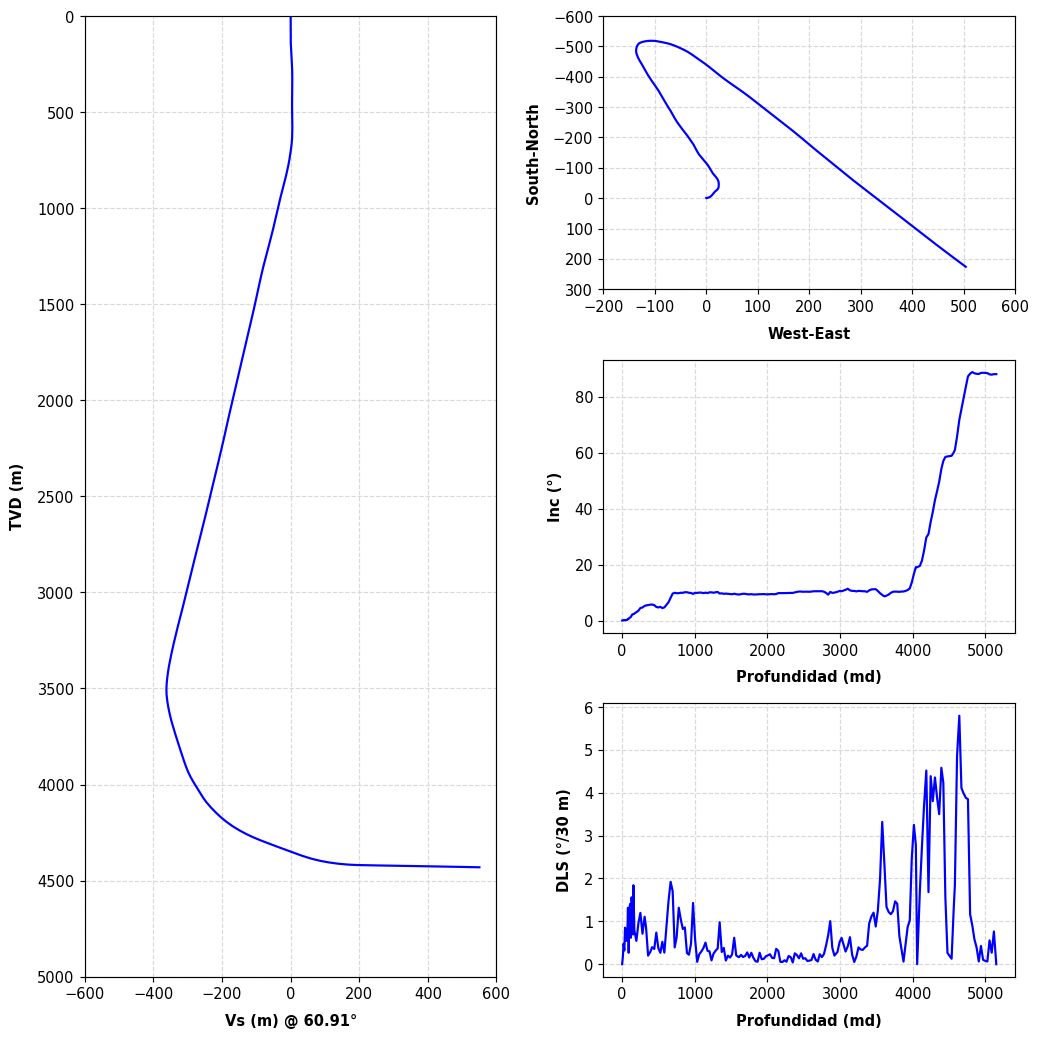

In [9]:
# Create the figure
fig, ax = plt.subplots(figsize=(10,10), dpi=105)
ax.remove()
plt.rcParams['axes.axisbelow'] = True

# Axes_1: Vertical-Section
ax1 = plt.subplot2grid(shape=(3,2),loc=(0,0),rowspan=3)
ax1.plot(df['VSEC'],df['TVD'],color='blue')
ax1.set_ylim(5000,0)
ax1.set_xlim(-600,600)
ax1.set_xlabel(f'Vs (m) @ {az_vs}°',weight='bold', labelpad=8)
ax1.set_ylabel('TVD (m)',weight='bold', labelpad=8)
ax1.set_yticks([i for i in range(0,5500,500)])
# ax1.tick_params(axis='x', labelsize= 12)
ax1.grid(c=(0.85,0.85,0.85), linestyle='dashed')

# #Axes_2: Plan-View
ax2 = plt.subplot2grid(shape=(3,2),loc=(0,1)) 
ax2.plot(df['EW'],df['NS'],color='blue')
ax2.set_xlim(-200,600)
ax2.set_ylim(300,-600)
ax2.set_xlabel('West-East',weight='bold', labelpad=8)
ax2.set_ylabel('South-North',weight='bold', labelpad=8)
ax2.grid(c=(0.85,0.85,0.85), linestyle='dashed')

# #Axes_3: Inc-depth
ax3 = plt.subplot2grid(shape=(3,2),loc=(1,1)) 
ax3.plot(df['MD'],df['INC'],color='blue')
# ax3.set_xlim(0,3500)
# ax3.set_ylim(0,40)
ax3.set_xlabel('Profundidad (md)',weight='bold', labelpad=8)
ax3.set_ylabel('Inc (°)',weight='bold', labelpad=8)
ax3.grid(c=(0.85,0.85,0.85), linestyle='dashed')

# #Axes_4: DLS-depth
ax4 = plt.subplot2grid(shape=(3,2),loc=(2,1))
ax4.plot(df['MD'],df['DLS'],color='blue')
# ax4.set_xlim(0,5500)
# ax4.set_ylim(0,5)
ax4.set_xlabel('Profundidad (md)',weight='bold', labelpad=8)
ax4.set_ylabel('DLS (°/30 m)',weight='bold',labelpad=8)
ax4.grid(c=(0.85,0.85,0.85), linestyle='dashed')

plt.tight_layout()
plt.show()

### 3D - Plot

In [7]:

#Trayectoria 3D
import pandas as pd
import plotly.express as px

x = df['EW']; y = df['NS']; z = df['TVD']
fig = px.line_3d(df,x,y,z, labels={'NS':'N/S (m)','EW':'E/O (m)','VD':'TVD (m)'},title='Balam-47',
range_x=[-200,600],range_y=[-600,300],range_z=[5000,0],)

fig.update_traces(line={'width':4,'color':'blue'})
fig.update_layout(scene=dict(
xaxis=dict(tickfont={'size':12},backgroundcolor='white',gridcolor='rgb(222,222,222)',tickvals=list(range(0,800,200))),
yaxis=dict(tickfont={'size':12},backgroundcolor='white',gridcolor='rgb(222,222,222)',tickvals=list(range(-600,600,200))),
zaxis=dict(tickfont={'size':12},backgroundcolor='white',gridcolor='rgb(222,222,222)',tickvals=list(range(0,5500,500)))))
fig.update_layout(width=800,height=800)
fig.show()